# django チュートリアル
## Setup
1. 仮想環境作成
python3 -m venv myenv
(myenv\Scripts\activate)
※pip（パッケージのインストール用のパッケージ）
2. プロジェクトの作成
django-admin.exe startproject mysite .
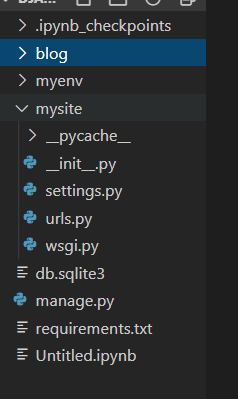
mysite/settings.pyでタイムゾーンの設定とか

サーバーの起動
python manage.py runserver

3. アプリケーションの作成
python manage.py startapp blog
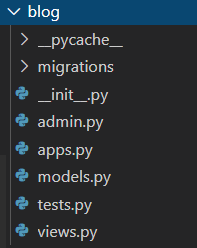

blog/models.py
でモデルの定義

→Migrationファイル作成
python manage.py makemigrations blog
→Migration（データベース作成）
python manage.py migrate blog
※モデルのところで、__zzz__が出てくる。これはダッターと呼ばれ、
特殊メソッドを表す
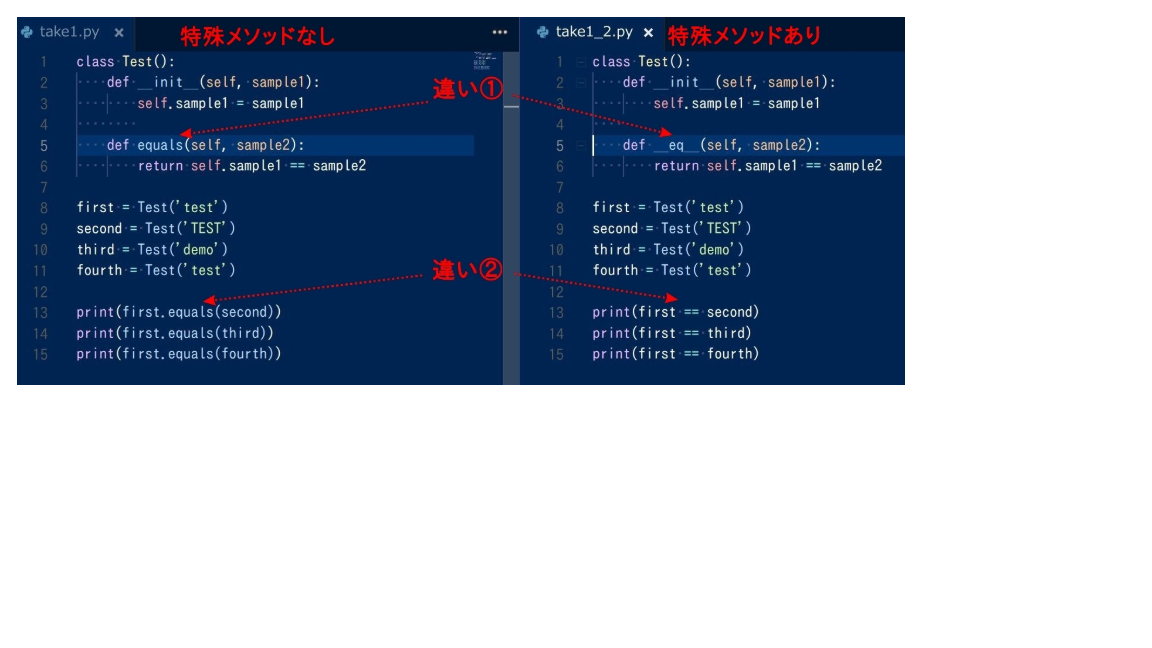
可読性のUpにつながる
4. Adminの設定
blog/admin.py
from django.contrib import admin
from .models import Post

admin.site.register(Post)
モデルをAdminページ（管理画面）上で見えるようにするため、admin.site.register(Post)でモデルを登録する必要があります。
python manage.py createsuperuser
User名：admin
パスワードsuperadmin

これでもうログインページまで出来ている。
フレームワークはすごいな



# VSCでの仮想環境
Set-ExecutionPolicy RemoteSigned -Scope Process
をやって実行ポリシーを変更する
そのあと
myenv\Scripts\activate


# GIT
```
git init
Initialized empty Git repository in ~/djangogirls/.git/
git config --global user.name "Your Name"
git config --global user.email you@example.com
```
## Git ignoreの設定
*.pyc
*~
/.vscode
__pycache__
myvenv
db.sqlite3
/static
.DS_Store
で保存

sqlite3をignoreするのは、データベースをWebとローカル環境で分けるため
## つなぐ
git remote add origin https://github.com/LonFri/MyFirstDjango.git

# PythonAnywhere
https://www.pythonanywhere.com/user/longfrie/  
My site: http://longfrie.pythonanywhere.com/  
My API TOKEN KEY  
40d682384259c63da0d022fdaf23d9f247972b02
```
import requests
username = 'longfrie'
token = '40d682384259c63da0d022fdaf23d9f247972b02'

response = requests.get(
  'https://www.pythonanywhere.com/api/v0/user/{username}/cpu/'.format(
      username=username
  ),
  headers={'Authorization': 'Token {token}'.format(token=token)}
)
if response.status_code == 200:
  print('CPU quota info:')
  print(response.content)
else:
  print('Got unexpected status code {}: {!r}'.format(response.status_code, response.content))
                        
```
## git から自動で構成するように
pa_autoconfigure_django.py --python=3.6 https://github.com/LonFri/
MyFirstDjango.git
```
・GitHubからコードをダウンロードする
・PC上でやったように、PythonAnywhere上に仮想環境 を作成する
・一部のデプロイメント設定で設定ファイルを更新する
・manage.py migrateコマンドを使ってPythonAnywhere上のデータベースをセットアップする
・静的ファイルの設定（これについては後で学習します）
・APIを通じてPythonAnywhereがあなたのWebアプリケーションを提供するように設定する
```
ここまでを自動でやってくれる

## 管理者の作成
ローカルとは別のDBなので、管理者を作る必要あり
python manage.py createsuperuser

admin
superadmin

# URLについて
mysite/urls.pyで一括管理
→どこに飛ばすかどのViewを使うかを指定

# View
ビュー はアプリのロジックを書いていくところ.
modelに情報を要求し、テンプレートに渡す、
ビューはただのPythonの関数
views.pyを編集

render テンプレートを組み立てる関数

# Template 
異なる情報を統一された形式で示すために繰り返し使われるファイル
Djangoのテンプレートのフォーマットは、HTML

## Dirの作成
blog/templates/blog
なぜ二つのBlogにするのか？
→以降の作業で分かるはず

## HTMLの作成
それぞれのHTMLページはheadとbodyという要素によって2つにわけられています.

headは文書についての情報を含む要素で、画面には表示されません。

bodyはWebページの一部として表示されるすべてを含む要素です。
```
<h1>ヘッダー</h1> 最も重要性の高い見出し
<h2>サブのヘッダー</h2> その次のレベルの見出し
<h3>サブのサブのヘッダー</h3>... など<h6>まで
<p>文章の段落</p>
<em>文章</em>で文章を強調する
<strong>文章</strong>でさらに文章を強調する
<br>は改行(brタグの中には何も書いてはいけません。閉じタグも無しです)
<a href="https://djangogirls.org">リンク</a> はリンクを生成します
<ul><li>第１の項目</li><li>第２の項目</li></ul> でリストを作成する、こんな感じに！
<div></div>はページ内のセクションを定義
```
<ul><li>第１の項目</li><li>第２の項目</li></ul>
→Jupyter markdownでも

→Git push

→AnywhereでのPULL
cd ~/longfrie.pythonanywhere.com
git pull

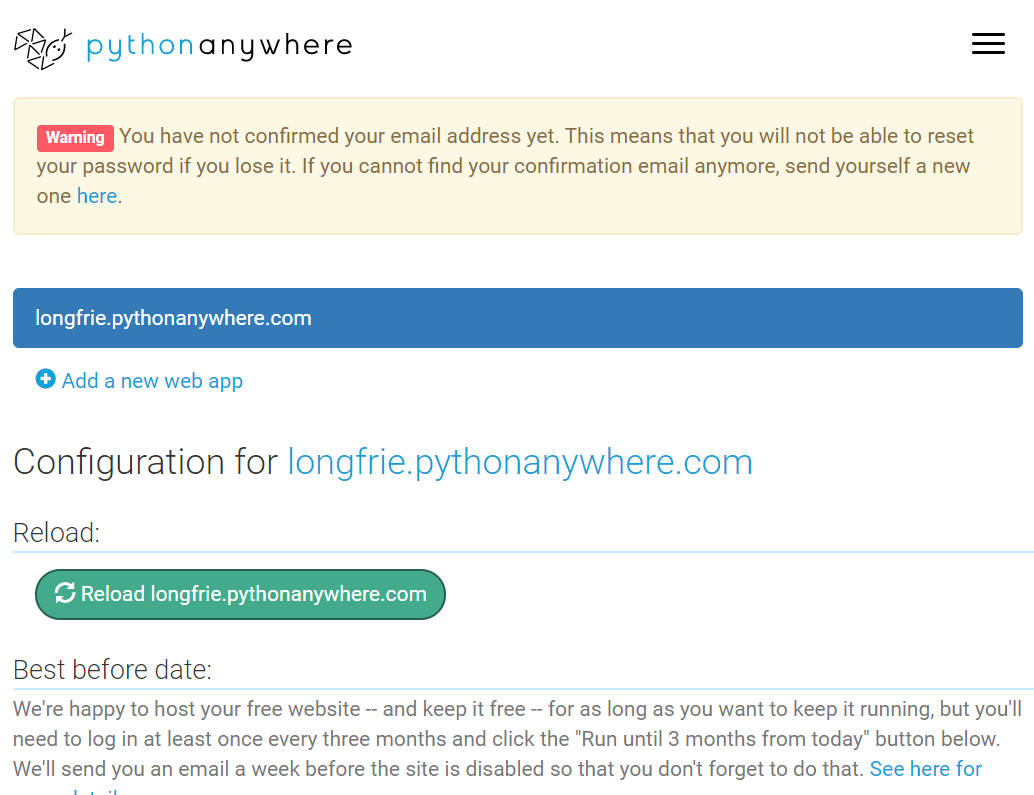
Reloadする

# クエリセット
モデルのオブジェクトのリスト  
python manage.py shell  

\>>>　で応答モード始まる  
Post.objects.all()
User.objects.all()
リストの取得

Post.objects.create(author=me, title='Sample title', text='Test')

でコンソールからの入力  
 from blog.models import Post  
from django.contrib.auth.models import User  
me = User.objects.get(username='ola')  
を忘れないでね  

Post.objects.filter(author=me)  
で特定のユーザーのPostを取得  
Post.objects.filter(title__contains='title')  
※アンダーバー二個に注意  
アンダーバー一個だと、フィールドと勘違いしてしまう

\>>> from django.utils import timezone  
\>>> Post.objects.filter(published_date__lte=timezone.now())
<QuerySet []>

post = Post.objects.get(title="Sample title")  
post.publish()  

Post.objects.order_by('created_date')

Post.objects.filter(published_date__lte=timezone.now()).order_by('published_date')  
上のように複数のメソッドをつなげることをメソッドチェーン

# templateへqueryを渡す
```
posts = Post.objects.filter(published_date__lte=timezone.now().order_by('published_date'))
return render(request, 'blog/post_list.html',{'posts': posts})
```
{}でクエリセットを渡す。　　　　
名前：値　　

参考：クエリセットの構文　　https://docs.djangoproject.com/ja/2.2/ref/models/querysets/

# Djangoテンプレートタグ 
静的なHTMLにPythonを読み込ませて動的にできる  
早くて簡単  
Djangoテンプレートで変数を表示するためには、次のように変数の名前を二重中括弧で括ります。  
{{ posts }}